<center><h1> Computational Drug Discovery </h1></center>

In [1]:
! pip install chembl_webresource_client

In [48]:
#Import libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client 

<h2>Search for Target protein </h2>

<h3> Target search for <h3>

In [4]:
target = new_client.target
target_query = target.search("heart")
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Oryctolagus cuniculus,Heart,17.0,False,CHEMBL613689,[],TISSUE,9986
1,[],Mus musculus,Heart,17.0,False,CHEMBL613573,[],TISSUE,10090
2,[],Rattus norvegicus,Heart,17.0,False,CHEMBL613629,[],TISSUE,10116
3,[],Cavia porcellus,Heart,17.0,False,CHEMBL613678,[],TISSUE,10141
4,[],Hoplobatrachus tigerinus,Heart,17.0,False,CHEMBL2367418,[],TISSUE,103373
5,[],Bos taurus,Heart phosphodiesterase,15.0,False,CHEMBL2111408,"[{'accession': 'Q01061', 'component_descriptio...",PROTEIN FAMILY,9913
6,"[{'xref_id': 'P05413', 'xref_name': None, 'xre...",Homo sapiens,Fatty acid binding protein muscle,13.0,False,CHEMBL3344,"[{'accession': 'P05413', 'component_descriptio...",SINGLE PROTEIN,9606
7,"[{'xref_id': 'P00336', 'xref_name': None, 'xre...",Sus scrofa,L-lactate dehydrogenase B chain,12.0,False,CHEMBL3823,"[{'accession': 'P00336', 'component_descriptio...",SINGLE PROTEIN,9823
8,[],Rattus norvegicus,L-lactate dehydrogenase B chain,12.0,False,CHEMBL2176834,"[{'accession': 'P42123', 'component_descriptio...",SINGLE PROTEIN,10116
9,[],Oryctolagus cuniculus,L-lactate dehydrogenase B chain,12.0,False,CHEMBL4523187,"[{'accession': 'P13490', 'component_descriptio...",SINGLE PROTEIN,9986


<h3> Select and retrieve bioactivity data for L-lactate dehydrogenase B chain <h3>

In [5]:
selected_target = targets.target_chembl_id[12]
selected_target

'CHEMBL4940'

In [6]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

retrieve bioactivity data reported as IC50 value

In [7]:
df = pd.DataFrame.from_dict(res)

In [8]:
df.head(3)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,10952882,[],CHEMBL2060672,Inhibition of human recombinant LDHB (2 to 334...,B,None,None,BAO_0000190,...,Homo sapiens,L-lactate dehydrogenase B chain,9606,None,None,IC50,uM,UO_0000065,None,7.8
1,None,Not Determined,10952883,[],CHEMBL2060672,Inhibition of human recombinant LDHB (2 to 334...,B,None,None,BAO_0000190,...,Homo sapiens,L-lactate dehydrogenase B chain,9606,None,None,IC50,None,None,None,None
2,None,Not Determined,10952884,[],CHEMBL2060672,Inhibition of human recombinant LDHB (2 to 334...,B,None,None,BAO_0000190,...,Homo sapiens,L-lactate dehydrogenase B chain,9606,None,None,IC50,None,None,None,None


In [9]:
df.standard_type.unique()

array(['IC50'], dtype=object)

In [10]:
df.to_csv('bioactivity_data.csv', index=False)

In [11]:
data=pd.read_csv('bioactivity_data.csv') 

<h3> Handling missing data </h3>

If any compounds has missing value for the standard value drop it

In [12]:
data2= data[data.standard_value.notna()]

In [13]:
data2.head(5)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,10952882,[],CHEMBL2060672,Inhibition of human recombinant LDHB (2 to 334...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,L-lactate dehydrogenase B chain,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,7.8
7,NaN,NaN,10952889,[],CHEMBL2060672,Inhibition of human recombinant LDHB (2 to 334...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,L-lactate dehydrogenase B chain,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,9.4
8,NaN,NaN,13298323,[],CHEMBL2384178,Inhibition of human recombinant carboxy-termin...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,L-lactate dehydrogenase B chain,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,33.8
9,NaN,NaN,13298324,[],CHEMBL2384178,Inhibition of human recombinant carboxy-termin...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,L-lactate dehydrogenase B chain,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,7.7
10,NaN,NaN,13298325,[],CHEMBL2384178,Inhibition of human recombinant carboxy-termin...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,L-lactate dehydrogenase B chain,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,2.4


<h3> Data pre-processing of the bioactivity data </h3>

In [14]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
data3= data2[selection]
data3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL1232973,O=C(O)c1nsnc1O,7800.0
7,CHEMBL2058994,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,9400.0
8,CHEMBL15976,NC(=O)C(=O)O,33800.0
9,CHEMBL2382405,CCC(Sc1nc(-c2cccc(OC)c2)c(C#N)c(=O)[nH]1)C(=O)...,7700.0
10,CHEMBL2382404,CCC(Sc1nc(-c2ccc(Cl)cc2)c(C#N)c(=O)[nH]1)C(=O)...,2400.0
...,...,...,...
231,CHEMBL5188480,O=C1NC(c2cccc(Nc3ccc(F)c(F)c3)n2)(c2cccc(Oc3cc...,650.0
232,CHEMBL5185237,O=C1NC(c2ccc(N3CCOCC3)cc2)(c2cccc(Nc3ccc(F)cc3...,1.7
233,CHEMBL5185237,O=C1NC(c2ccc(N3CCOCC3)cc2)(c2cccc(Nc3ccc(F)cc3...,38.0
234,CHEMBL5201115,O=C1NC(c2ccc(N3CCOCC3)cc2)(c2cccc(Oc3ccc(F)cc3...,2.2


In [15]:
data3.to_csv('l_lactatedehydrogenase_bioactivity_data_preprocessed.csv', index=False)


<h3> Labeling compounds as either being active, inactive or intermediate </h3>
<br>The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. As for those values in between 1,000 and 10,000 nM will be referred to as intermediate.

In [16]:
data4= pd.read_csv('l_lactatedehydrogenase_bioactivity_data_preprocessed.csv')

In [17]:
bioactivity_threshold = []
for i in data4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [18]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
data5 = pd.concat([data4, bioactivity_class], axis=1)
data5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL1232973,O=C(O)c1nsnc1O,7800.0,intermediate
1,CHEMBL2058994,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,9400.0,intermediate
2,CHEMBL15976,NC(=O)C(=O)O,33800.0,inactive
3,CHEMBL2382405,CCC(Sc1nc(-c2cccc(OC)c2)c(C#N)c(=O)[nH]1)C(=O)...,7700.0,intermediate
4,CHEMBL2382404,CCC(Sc1nc(-c2ccc(Cl)cc2)c(C#N)c(=O)[nH]1)C(=O)...,2400.0,intermediate
...,...,...,...,...
206,CHEMBL5188480,O=C1NC(c2cccc(Nc3ccc(F)c(F)c3)n2)(c2cccc(Oc3cc...,650.0,active
207,CHEMBL5185237,O=C1NC(c2ccc(N3CCOCC3)cc2)(c2cccc(Nc3ccc(F)cc3...,1.7,active
208,CHEMBL5185237,O=C1NC(c2ccc(N3CCOCC3)cc2)(c2cccc(Nc3ccc(F)cc3...,38.0,active
209,CHEMBL5201115,O=C1NC(c2ccc(N3CCOCC3)cc2)(c2cccc(Oc3ccc(F)cc3...,2.2,active


In [19]:
data5.to_csv('l_lactatedehydrogenase_bioactivity_data_curated.csv', index=False)


In [20]:
! zip lactatedehydrogenase.zip *.csv

updating: bioactivity_data.csv (deflated 92%)
updating: l_lactatedehydrogenase_bioactivity_data_curated.csv (deflated 84%)
updating: l_lactatedehydrogenase_bioactivity_data_preprocessed.csv (deflated 83%)


In [21]:
! ls -l

total 672
-rw-r--r--  1 enriqueviv  staff  148233 Jul 23 18:08 bioactivity_data.csv
-rw-r--r--  1 enriqueviv  staff   18259 Jul 23 18:08 l_lactatedehydrogenase_bioactivity_data_curated.csv
-rw-r--r--  1 enriqueviv  staff   16326 Jul 23 18:08 l_lactatedehydrogenase_bioactivity_data_preprocessed.csv
-rw-r--r--  1 enriqueviv  staff   18361 Jul 23 18:08 lactatedehydrogenase.zip
-rw-r--r--  1 enriqueviv  staff   78336 Jul 23 18:03 lactatedehydrogenase_bioactivity.ipynb


In [22]:
df = df = pd.read_csv('l_lactatedehydrogenase_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL1232973,O=C(O)c1nsnc1O,7800.0,intermediate
1,CHEMBL2058994,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,9400.0,intermediate
2,CHEMBL15976,NC(=O)C(=O)O,33800.0,inactive
3,CHEMBL2382405,CCC(Sc1nc(-c2cccc(OC)c2)c(C#N)c(=O)[nH]1)C(=O)...,7700.0,intermediate
4,CHEMBL2382404,CCC(Sc1nc(-c2ccc(Cl)cc2)c(C#N)c(=O)[nH]1)C(=O)...,2400.0,intermediate
...,...,...,...,...
206,CHEMBL5188480,O=C1NC(c2cccc(Nc3ccc(F)c(F)c3)n2)(c2cccc(Oc3cc...,650.0,active
207,CHEMBL5185237,O=C1NC(c2ccc(N3CCOCC3)cc2)(c2cccc(Nc3ccc(F)cc3...,1.7,active
208,CHEMBL5185237,O=C1NC(c2ccc(N3CCOCC3)cc2)(c2cccc(Nc3ccc(F)cc3...,38.0,active
209,CHEMBL5201115,O=C1NC(c2ccc(N3CCOCC3)cc2)(c2cccc(Oc3ccc(F)cc3...,2.2,active


In [23]:
df_no_smiles = df.drop(columns='canonical_smiles')


In [24]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')
     

In [25]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL1232973,7800.0,intermediate,O=C(O)c1nsnc1O
1,CHEMBL2058994,9400.0,intermediate,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...
2,CHEMBL15976,33800.0,inactive,NC(=O)C(=O)O
3,CHEMBL2382405,7700.0,intermediate,CCC(Sc1nc(-c2cccc(OC)c2)c(C#N)c(=O)[nH]1)C(=O)...
4,CHEMBL2382404,2400.0,intermediate,CCC(Sc1nc(-c2ccc(Cl)cc2)c(C#N)c(=O)[nH]1)C(=O)...
...,...,...,...,...
206,CHEMBL5188480,650.0,active,O=C1NC(c2cccc(Nc3ccc(F)c(F)c3)n2)(c2cccc(Oc3cc...
207,CHEMBL5185237,1.7,active,O=C1NC(c2ccc(N3CCOCC3)cc2)(c2cccc(Nc3ccc(F)cc3...
208,CHEMBL5185237,38.0,active,O=C1NC(c2ccc(N3CCOCC3)cc2)(c2cccc(Nc3ccc(F)cc3...
209,CHEMBL5201115,2.2,active,O=C1NC(c2ccc(N3CCOCC3)cc2)(c2cccc(Oc3ccc(F)cc3...


<h3> Lipinski descriptors</h3>

rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10


In [26]:
#!conda install -c conda-forge rdkit


In [27]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

<h3> Calculate descriptors </h3>

In [28]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [29]:

df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,146.127,-0.05810,2.0,5.0
1,667.462,-2.81000,8.0,18.0
2,89.050,-1.44370,2.0,2.0
3,499.574,2.47398,3.0,8.0
4,503.993,3.11878,3.0,7.0
...,...,...,...,...
206,680.136,8.81770,3.0,8.0
207,603.119,6.77970,3.0,7.0
208,603.119,6.77970,3.0,7.0
209,604.103,6.82840,2.0,7.0


In [30]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,146.127,-0.05810,2.0,5.0
1,667.462,-2.81000,8.0,18.0
2,89.050,-1.44370,2.0,2.0
3,499.574,2.47398,3.0,8.0
4,503.993,3.11878,3.0,7.0
...,...,...,...,...
206,680.136,8.81770,3.0,8.0
207,603.119,6.77970,3.0,7.0
208,603.119,6.77970,3.0,7.0
209,604.103,6.82840,2.0,7.0


In [31]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL1232973,O=C(O)c1nsnc1O,7800.0,intermediate
1,CHEMBL2058994,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,9400.0,intermediate
2,CHEMBL15976,NC(=O)C(=O)O,33800.0,inactive
3,CHEMBL2382405,CCC(Sc1nc(-c2cccc(OC)c2)c(C#N)c(=O)[nH]1)C(=O)...,7700.0,intermediate
4,CHEMBL2382404,CCC(Sc1nc(-c2ccc(Cl)cc2)c(C#N)c(=O)[nH]1)C(=O)...,2400.0,intermediate
...,...,...,...,...
206,CHEMBL5188480,O=C1NC(c2cccc(Nc3ccc(F)c(F)c3)n2)(c2cccc(Oc3cc...,650.0,active
207,CHEMBL5185237,O=C1NC(c2ccc(N3CCOCC3)cc2)(c2cccc(Nc3ccc(F)cc3...,1.7,active
208,CHEMBL5185237,O=C1NC(c2ccc(N3CCOCC3)cc2)(c2cccc(Nc3ccc(F)cc3...,38.0,active
209,CHEMBL5201115,O=C1NC(c2ccc(N3CCOCC3)cc2)(c2cccc(Oc3ccc(F)cc3...,2.2,active


In [32]:
df_combined = pd.concat([df,df_lipinski], axis=1)


In [33]:
df_combined


,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL1232973,O=C(O)c1nsnc1O,7800.0,intermediate,146.127,-0.05810,2.0,5.0
1,CHEMBL2058994,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,9400.0,intermediate,667.462,-2.81000,8.0,18.0
2,CHEMBL15976,NC(=O)C(=O)O,33800.0,inactive,89.050,-1.44370,2.0,2.0
3,CHEMBL2382405,CCC(Sc1nc(-c2cccc(OC)c2)c(C#N)c(=O)[nH]1)C(=O)...,7700.0,intermediate,499.574,2.47398,3.0,8.0
4,CHEMBL2382404,CCC(Sc1nc(-c2ccc(Cl)cc2)c(C#N)c(=O)[nH]1)C(=O)...,2400.0,intermediate,503.993,3.11878,3.0,7.0
...,...,...,...,...,...,...,...,...
206,CHEMBL5188480,O=C1NC(c2cccc(Nc3ccc(F)c(F)c3)n2)(c2cccc(Oc3cc...,650.0,active,680.136,8.81770,3.0,8.0
207,CHEMBL5185237,O=C1NC(c2ccc(N3CCOCC3)cc2)(c2cccc(Nc3ccc(F)cc3...,1.7,active,603.119,6.77970,3.0,7.0
208,CHEMBL5185237,O=C1NC(c2ccc(N3CCOCC3)cc2)(c2cccc(Nc3ccc(F)cc3...,38.0,active,603.119,6.77970,3.0,7.0
209,CHEMBL5201115,O=C1NC(c2ccc(N3CCOCC3)cc2)(c2cccc(Oc3ccc(F)cc3...,2.2,active,604.103,6.82840,2.0,7.0


<h3> Convert IC50 to pIC50 </h3>

To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

* Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10
* Take the molar value and apply -log10
* Delete the standard_value column and create a new pIC50 column

In [34]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [35]:
df_combined.standard_value.describe()

count       211.000000
mean      14511.867773
std       29071.110141
min           1.700000
25%         140.000000
50%        1500.000000
75%       10000.000000
max      100000.000000
Name: standard_value, dtype: float64

In [36]:
-np.log10( (10**-9)* 100000000 )


1.0

In [37]:
-np.log10( (10**-9)* 10000000000 )


-1.0

In [38]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.



In [39]:
df_norm = norm_value(df_combined)
df_norm

/var/folders/8r/1rwtjmt1489bxf0kzr5g5s300000gn/T/ipykernel_52741/3416609517.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL1232973,O=C(O)c1nsnc1O,intermediate,146.127,-0.05810,2.0,5.0,7800.0
1,CHEMBL2058994,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,intermediate,667.462,-2.81000,8.0,18.0,9400.0
2,CHEMBL15976,NC(=O)C(=O)O,inactive,89.050,-1.44370,2.0,2.0,33800.0
3,CHEMBL2382405,CCC(Sc1nc(-c2cccc(OC)c2)c(C#N)c(=O)[nH]1)C(=O)...,intermediate,499.574,2.47398,3.0,8.0,7700.0
4,CHEMBL2382404,CCC(Sc1nc(-c2ccc(Cl)cc2)c(C#N)c(=O)[nH]1)C(=O)...,intermediate,503.993,3.11878,3.0,7.0,2400.0
...,...,...,...,...,...,...,...,...
206,CHEMBL5188480,O=C1NC(c2cccc(Nc3ccc(F)c(F)c3)n2)(c2cccc(Oc3cc...,active,680.136,8.81770,3.0,8.0,650.0
207,CHEMBL5185237,O=C1NC(c2ccc(N3CCOCC3)cc2)(c2cccc(Nc3ccc(F)cc3...,active,603.119,6.77970,3.0,7.0,1.7
208,CHEMBL5185237,O=C1NC(c2ccc(N3CCOCC3)cc2)(c2cccc(Nc3ccc(F)cc3...,active,603.119,6.77970,3.0,7.0,38.0
209,CHEMBL5201115,O=C1NC(c2ccc(N3CCOCC3)cc2)(c2cccc(Oc3ccc(F)cc3...,active,604.103,6.82840,2.0,7.0,2.2


In [40]:
df_norm.standard_value_norm.describe()


count       211.000000
mean      14511.867773
std       29071.110141
min           1.700000
25%         140.000000
50%        1500.000000
75%       10000.000000
max      100000.000000
Name: standard_value_norm, dtype: float64

In [41]:
df_final = pIC50(df_norm)
df_final

/var/folders/8r/1rwtjmt1489bxf0kzr5g5s300000gn/T/ipykernel_52741/911978885.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1232973,O=C(O)c1nsnc1O,intermediate,146.127,-0.05810,2.0,5.0,5.107905
1,CHEMBL2058994,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,intermediate,667.462,-2.81000,8.0,18.0,5.026872
2,CHEMBL15976,NC(=O)C(=O)O,inactive,89.050,-1.44370,2.0,2.0,4.471083
3,CHEMBL2382405,CCC(Sc1nc(-c2cccc(OC)c2)c(C#N)c(=O)[nH]1)C(=O)...,intermediate,499.574,2.47398,3.0,8.0,5.113509
4,CHEMBL2382404,CCC(Sc1nc(-c2ccc(Cl)cc2)c(C#N)c(=O)[nH]1)C(=O)...,intermediate,503.993,3.11878,3.0,7.0,5.619789
...,...,...,...,...,...,...,...,...
206,CHEMBL5188480,O=C1NC(c2cccc(Nc3ccc(F)c(F)c3)n2)(c2cccc(Oc3cc...,active,680.136,8.81770,3.0,8.0,6.187087
207,CHEMBL5185237,O=C1NC(c2ccc(N3CCOCC3)cc2)(c2cccc(Nc3ccc(F)cc3...,active,603.119,6.77970,3.0,7.0,8.769551
208,CHEMBL5185237,O=C1NC(c2ccc(N3CCOCC3)cc2)(c2cccc(Nc3ccc(F)cc3...,active,603.119,6.77970,3.0,7.0,7.420216
209,CHEMBL5201115,O=C1NC(c2ccc(N3CCOCC3)cc2)(c2cccc(Oc3ccc(F)cc3...,active,604.103,6.82840,2.0,7.0,8.657577


In [42]:
df_final.pIC50.describe()


count    211.000000
mean       5.903037
std        1.176350
min        4.000000
25%        5.000000
50%        5.823909
75%        6.853872
max        8.769551
Name: pIC50, dtype: float64

In [43]:
df_final.to_csv('l_lactatedehydrogenase_bioactivity_data_pIC50.csv')

Removing the 'intermediate' bioactivity class

In [44]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL15976,NC(=O)C(=O)O,inactive,89.050,-1.44370,2.0,2.0,4.471083
8,CHEMBL210497,COc1cccc(-c2nc(SCC(=O)Nc3ccc(S(N)(=O)=O)cc3)nc...,inactive,471.520,2.10768,3.0,9.0,4.248721
9,CHEMBL2382400,N#Cc1c(-c2ccccc2)nc(SCC(=O)Nc2ccc(S(N)(=O)=O)c...,inactive,441.494,1.68678,3.0,7.0,4.368556
10,CHEMBL2382399,Cc1ccc(NC(=O)CSc2nc(-c3ccc(Cl)cc3)c(C#N)c(=O)[...,inactive,424.913,4.30962,2.0,5.0,4.000000
11,CHEMBL2382398,COc1ccc(NC(=O)CSc2nc(-c3ccc(Cl)cc3)c(C#N)c(=O)...,inactive,461.330,4.35478,2.0,6.0,4.000000
...,...,...,...,...,...,...,...,...
206,CHEMBL5188480,O=C1NC(c2cccc(Nc3ccc(F)c(F)c3)n2)(c2cccc(Oc3cc...,active,680.136,8.81770,3.0,8.0,6.187087
207,CHEMBL5185237,O=C1NC(c2ccc(N3CCOCC3)cc2)(c2cccc(Nc3ccc(F)cc3...,active,603.119,6.77970,3.0,7.0,8.769551
208,CHEMBL5185237,O=C1NC(c2ccc(N3CCOCC3)cc2)(c2cccc(Nc3ccc(F)cc3...,active,603.119,6.77970,3.0,7.0,7.420216
209,CHEMBL5201115,O=C1NC(c2ccc(N3CCOCC3)cc2)(c2cccc(Oc3ccc(F)cc3...,active,604.103,6.82840,2.0,7.0,8.657577


In [45]:
df_2class.to_csv('l_lactatedehydrogenase_bioactivity_data_2class_pIC50.csv')


<h3>Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors</h3>

In [49]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 393.9 kB/s eta 0:00:00a 0:00:01


In [50]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

<h3>Frequency plot of the 2 bioactivity classes</h3>

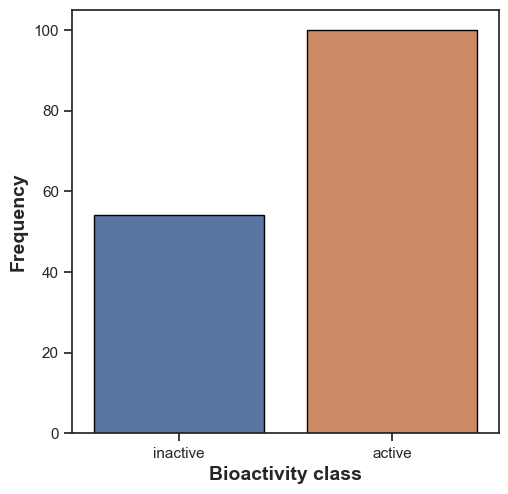

In [52]:

plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

<h3>Frequency plot of the 2 bioactivity classes</h3>

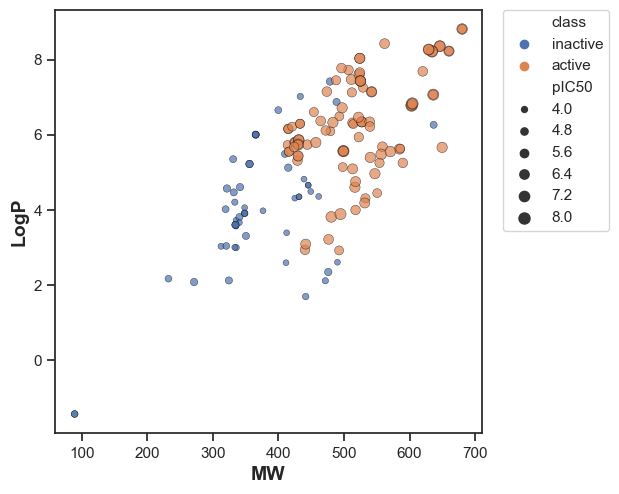

In [53]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

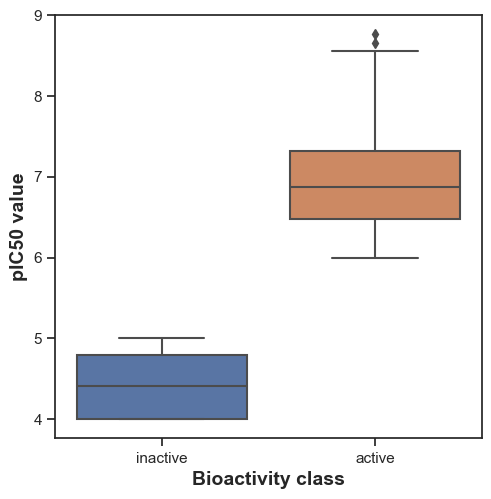

In [54]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [57]:
!pip install scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/69/9d/c6877258056c94027cae871fb5bc220edbaab5be2d6f6bc7e6081164b038/scipy-1.11.1-cp310-cp310-macosx_12_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 132.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.6/29.6 MB 8.6 MB/s eta 0:00:0000:0100:01m
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-macos 2.12.0 requires wrapt<1.15,>=1.11.0, which is not installed.


In [55]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [58]:
mannwhitney('pIC50')


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,5400.0,1.491625e-24,0.05,Different distribution (reject H0)


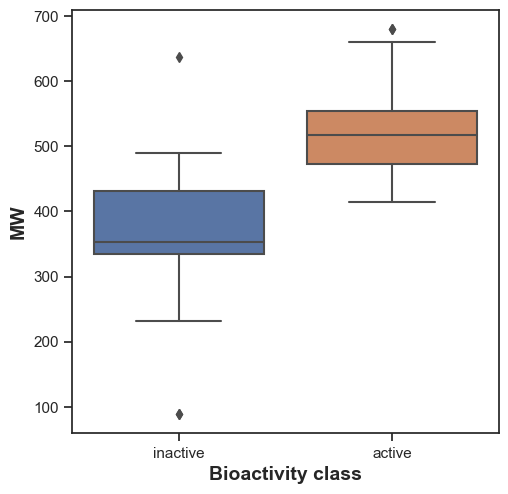

In [59]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')



In [60]:
mannwhitney('MW')


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,4982.5,5.572443e-18,0.05,Different distribution (reject H0)


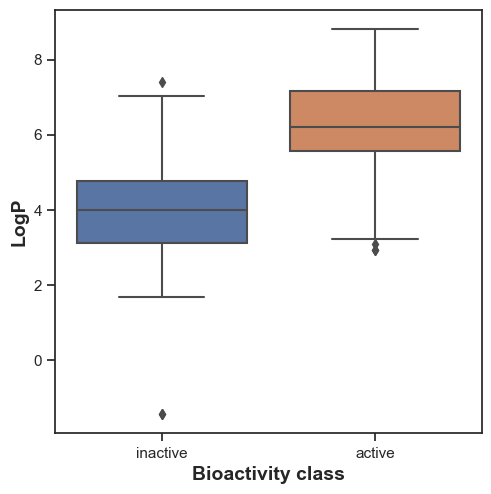

In [61]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')



In [62]:

mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,4651.0,1.516045e-13,0.05,Different distribution (reject H0)


Text(0, 0.5, 'NumHDonors')

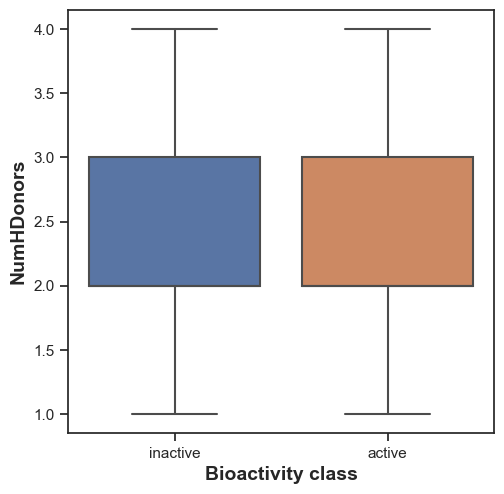

In [63]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')


     

In [64]:
mannwhitney('NumHDonors')


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2778.0,0.753276,0.05,Same distribution (fail to reject H0)


Text(0, 0.5, 'NumHAcceptors')

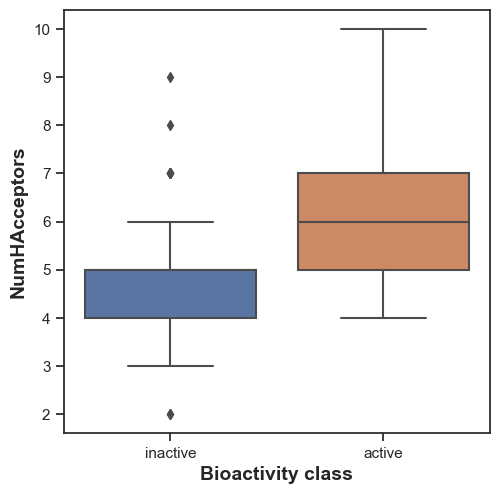

In [65]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

In [66]:
mannwhitney('NumHAcceptors')


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,4258.0,1.473766e-09,0.05,Different distribution (reject H0)


Interpretation of Statistical Results
<br> 
Box Plots
pIC50 values
Taking a look at pIC50 values, the actives and inactives displayed *statistically significant difference*, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

Lipinski's descriptors
All of the 4 Lipinski's descriptors exhibited *statistically significant difference* between the actives and inactives.

In [67]:
! zip -r results.zip . -i *.csv *.pdf


  adding: l_lactatedehydrogenase_bioactivity_data_pIC50.csv (deflated 79%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: bioactivity_data.csv (deflated 92%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: l_lactatedehydrogenase_bioactivity_data_curated.csv (deflated 84%)
  adding: mannwhitneyu_MW.csv (deflated 7%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: plot_MW.pdf (deflated 38%)
  adding: l_lactatedehydrogenase_bioactivity_data_preprocessed.csv (deflated 83%)
  adding: l_lactatedehydrogenase_bioactivity_data_2class_pIC50.csv (deflated 78%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)


In [70]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

zsh:1: command not found: wget
zsh:1: command not found: wget
